# DATA620 Project 1: Centrality Measures
## Alain T. Kuiete

### Importing Libraries

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from operator import itemgetter

## Loading the Dataset


In [2]:
students = pd.read_csv('https://raw.githubusercontent.com/AlainKuiete/DATA620ASSIGNMENTS/master/out.moreno_seventh_seventh',
                       sep=' ', header=None, names=['stud1', 'stud2', 'wght'])


In [3]:
students.head()

,stud1,stud2,wght
0,%,asym,posweighted
1,%,376,29
2,1,2,1
3,1,3,1
4,1,4,2


In [4]:
students = students.iloc[2:,:].reset_index(drop=True)

In [5]:
students.head()

,stud1,stud2,wght
0,1,2,1
1,1,3,1
2,1,4,2
3,1,5,2
4,1,6,3


In [6]:
attributes = pd.read_csv('https://raw.githubusercontent.com/AlainKuiete/DATA620ASSIGNMENTS/master/ent.moreno_seventh_seventh.student.gender', 
                        header=None, names=['gender'])

In [7]:
attributes.insert(0, 'Id', attributes.index +1,True) 

In [8]:
attributes.head()

,Id,gender
0,1,male
1,2,male
2,3,male
3,4,male
4,5,male


In [9]:
attributes = attributes.astype({"Id":str})

In [10]:
attributes.shape

(29, 2)

In [11]:
attr_dict = dict(zip(attributes.Id, attributes.gender))
attr_dict

{'1': 'male',
 '2': 'male',
 '3': 'male',
 '4': 'male',
 '5': 'male',
 '6': 'male',
 '7': 'male',
 '8': 'female',
 '9': 'female',
 '10': 'female',
 '11': 'female',
 '12': 'female',
 '13': 'female',
 '14': 'female',
 '15': 'female',
 '16': 'male',
 '17': 'male',
 '18': 'male',
 '19': 'male',
 '20': 'female',
 '21': 'female',
 '22': 'male',
 '23': 'female',
 '24': 'female',
 '25': 'female',
 '26': 'female',
 '27': 'female',
 '28': 'female',
 '29': 'female'}

### Create Graph

In [12]:
g = nx.Graph()

### Add nodes attributes

In [13]:
nodes_id = [n[0] for n in attributes]

In [20]:
g.add_nodes_from(nodes_id, attr=attr_dict, 'gender')

### Add edges and edge properties

In [21]:
for i, line in students.iterrows():
    g.add_edge(line[0], line[1], weigth=line[2])
    

In [26]:
nx.set_node_attributes(g, attr_dict, 'gender')

In [27]:
node_gender = list(nx.get_node_attributes(g, 'gender').values())

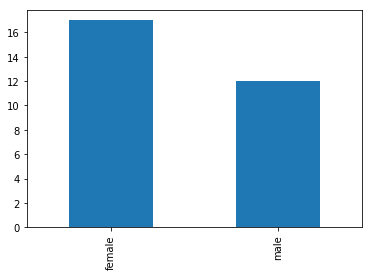

In [28]:
pd.value_counts(node_gender).plot.bar()

In [29]:
g.nodes(data=True)

NodeDataView({'I': {'attr': {'1': 'male', '2': 'male', '3': 'male', '4': 'male', '5': 'male', '6': 'male', '7': 'male', '8': 'female', '9': 'female', '10': 'female', '11': 'female', '12': 'female', '13': 'female', '14': 'female', '15': 'female', '16': 'male', '17': 'male', '18': 'male', '19': 'male', '20': 'female', '21': 'female', '22': 'male', '23': 'female', '24': 'female', '25': 'female', '26': 'female', '27': 'female', '28': 'female', '29': 'female'}}, 'g': {'attr': {'1': 'male', '2': 'male', '3': 'male', '4': 'male', '5': 'male', '6': 'male', '7': 'male', '8': 'female', '9': 'female', '10': 'female', '11': 'female', '12': 'female', '13': 'female', '14': 'female', '15': 'female', '16': 'male', '17': 'male', '18': 'male', '19': 'male', '20': 'female', '21': 'female', '22': 'male', '23': 'female', '24': 'female', '25': 'female', '26': 'female', '27': 'female', '28': 'female', '29': 'female'}}, '1': {'gender': 'male'}, '2': {'gender': 'male'}, '3': {'gender': 'male'}, '4': {'gender':

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


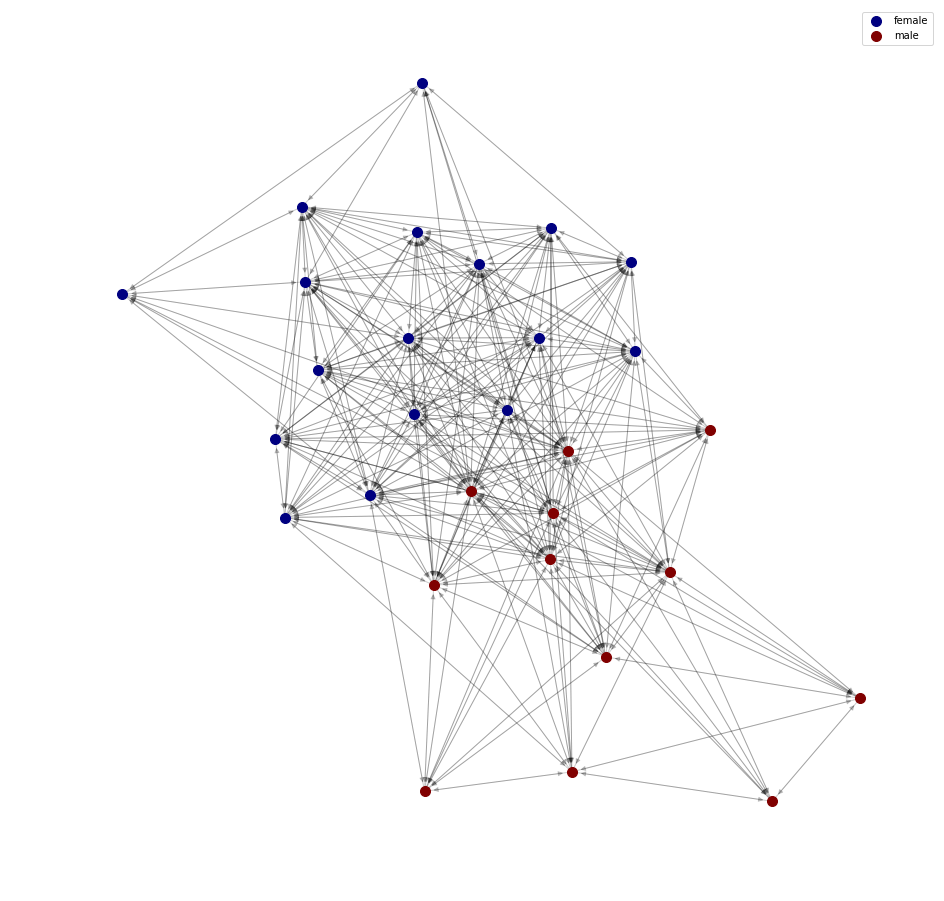

In [42]:
h = nx.DiGraph(g)
plt.figure(figsize=(16, 16))
genders = set(node_gender)
node_gender_dict = nx.get_node_attributes(h, 'gender')
colors = [plt.cm.jet(x) for x in np.linspace(0,1,len(genders))]
pos = nx.spring_layout(h)

for i, gender in enumerate(genders):
    gender_nodes = [node for node, value in node_gender_dict.items() if value == gender]
    nx.draw_networkx_nodes(h, pos, nodelist=gender_nodes, node_color=colors[i], label=gender,
                         with_labels=False, node_size=100, cmap=plt.cm.jet)
    
nx.draw_networkx_edges(h, pos, alpha=0.2)


plt.legend()
plt.axis('off')
plt.show()




## Degree Centrality

#### Number of Neighbors that a node has / Number of Neighbors that node could possibly have.

In [70]:
degrees = [len(list(g.neighbors(n))) for n in g.nodes()]
deg_cent = nx.degree_centrality(g)

#### Histogram of degree centrality 

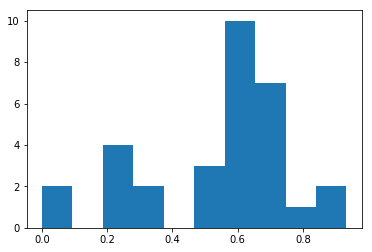

In [68]:
plt.figure()
plt.hist(list(deg_cent.values()))
plt.show()

#### Scatter plot of centrality distribution in term of degree distribution

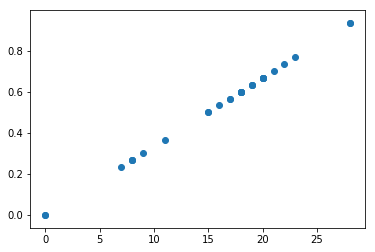

In [71]:
plt.figure()
plt.scatter(degrees, list(deg_cent.values()))
plt.show()

#### Nodes that can broadcast messages efficiently to lot of people at one degree of separartion away.

In [61]:
def nodes_with_highest_deg_cent(h):
    deg_cent = nx.degree_centrality(h)
    max_dc = max(list(deg_cent.values()))
    nodes = set()
    for k,v in deg_cent.items():
        if v == max_dc:
            nodes.add(k)
    return nodes

In [62]:
top_dc = nodes_with_highest_deg_cent(g)

In [63]:
print(top_dc)

{'6', '5'}


## Closeness Centrality

### Average shortest path from a node A to a node B

## Betweenness Centrality

#### Number of shortest paths through a node / all possible shortest paths

In [54]:
bet_cen = nx.betweenness_centrality(g)

In [55]:
deg_cen = nx.degree_centrality(g)

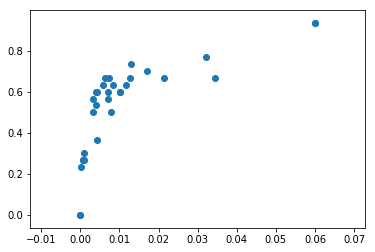

In [57]:
plt.scatter(list(bet_cen.values()), list(deg_cen.values()))
plt.show()

In [64]:
def nodes_with_highest_bet_cent(h):
    deg_cent = nx.betweenness_centrality(h)
    max_dc = max(list(deg_cent.values()))
    nodes = set()
    for k,v in deg_cent.items():
        if v == max_dc:
            nodes.add(k)
    return nodes

In [65]:
top_bet = nodes_with_highest_bet_cent(g)

In [66]:
print(top_bet)

{'6', '5'}


## Eigenvector Centrality